Using set of breast cancer data, create a model to predict breast cancer. Also, what traits are most indicative of whether or not an individual will be diagnosed?

Dataset:http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [31]:
column_names = ['ID','Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion',\
                'Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class']
df = pd.read_csv('breast-cancer-wisconsin.csv',header = None, names = column_names)

#print(df.isnull().sum())
print(df.size)
#print(df.dtypes)
df = df[df.Bare_Nuclei != '?']
print(df.size)
# change the output(Class) to be 0 - benigh or 1 - malignant
features = df.drop(['ID','Class'],1)
target =  np.where((df['Class'] == 4), 1, 0).ravel()
print('\nNumber in each class:')
print(df.groupby('Class')['Class'].count(),'\n')



7689
7513

Number in each class:
Class
2    444
4    239
Name: Class, dtype: int64 



In [39]:
from sklearn.cross_validation import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions train dataset:  478
Number transactions test dataset:  205
Total number of transactions:  683


C:\Users\stace\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [40]:
rfc = ensemble.RandomForestClassifier()

rfc.fit(X_train,y_train)
print(cross_val_score(rfc, X_test, y_test, cv=5))
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

#table = pd.crosstab(Y,pred_y_sklearn)

[ 1.          0.97560976  0.92682927  0.87804878  0.97560976]


Feature ranking:
1. feature Clump_Thickness (0.281635)
2. feature Uniformity_of_Cell_Size (0.265277)
3. feature Uniformity_of_Cell_Shape (0.185750)
4. feature Marginal_Adhesion (0.134397)
5. feature Single_Epithelial_Cell_Size (0.056098)
6. feature Bare_Nuclei (0.025097)
7. feature Bland_Chromatin (0.022914)
8. feature Normal_Nucleoli (0.021654)
9. feature Mitoses (0.007178)


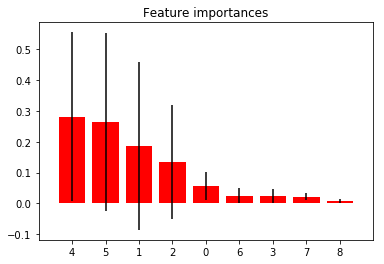

In [33]:
# Print the feature ranking
print("Feature ranking:")

for f in range(features.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, features.columns[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(features.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(features.shape[1]), indices)
plt.xlim([-1, features.shape[1]])
plt.show()

### Conclusions
- Was able to get good predictions using a Random Forest Model
- Standard Error bars huge for feature importance...